In [7]:
!pip -q install qiskit qiskit-ibm-runtime matplotlib

In [10]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Replace 'MY_TOKEN' with your actual token from the IBM Quantum dashboard
QiskitRuntimeService.save_account(channel="ibm_quantum_platform", token="INTxoUql5p91V701WIVZaQ-8iCATC4E1PrCWihh_U9gG", overwrite=True)




In [11]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()  # uses the saved token
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=1)
print("Using backend:", backend.name)


qiskit_runtime_service.__init__:WARNING:2025-10-28 14:17:06,307: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: open-instance. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().
qiskit_runtime_service.backends:WARNING:2025-10-28 14:17:07,095: Loading instance: open-instance, plan: open
qiskit_runtime_service.backends:WARNING:2025-10-28 14:17:07,842: Using instance: open-instance, plan: open


Using backend: ibm_torino


Hardware counts: {'1': 944, '0': 1056}


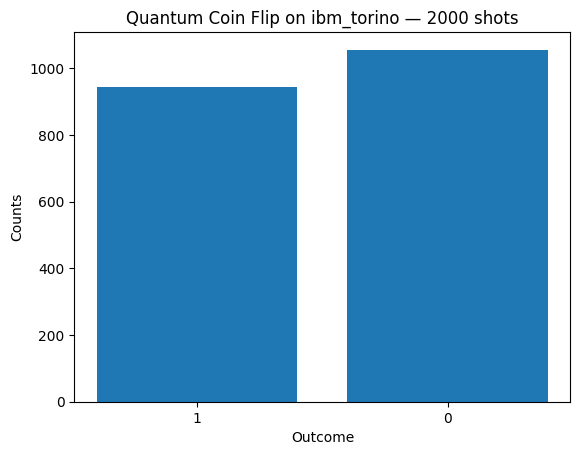

In [13]:
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime import SamplerV2 as Sampler
import matplotlib.pyplot as plt

qc = QuantumCircuit(1)
qc.h(0)              # ideal circuit uses H
qc.measure_all()

# 🔧 Make it ISA-compliant for THIS backend
isa_qc = transpile(qc, target=backend.target, optimization_level=1)

# 4) Run on hardware
SHOTS = 2000
sampler = Sampler(mode=backend)
job = sampler.run([isa_qc], shots=SHOTS)
result = job.result()
counts = result[0].join_data().get_counts()

print("Hardware counts:", counts)

plt.figure()
plt.bar(list(counts.keys()), list(counts.values()))
plt.title(f"Quantum Coin Flip on {backend.name} — {SHOTS} shots")
plt.xlabel("Outcome"); plt.ylabel("Counts")
plt.show()